In [9]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print(X_train[0])
# Normalize the pixel values (0-255) to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print("------------------------\n\n")
print(y_train[0])
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("------------------------\n\n")
print(y_train[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
------------------------


5
------------------------


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# Build the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D vectors of size 784
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for classification
])
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2, # Use 20% of training data for validation
    epochs=10,           # Number of epochs
    batch_size=32,       # Mini-batch size
    verbose=2            # Display training progress
)

Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9208 - loss: 0.2683 - val_accuracy: 0.9574 - val_loss: 0.1407
Epoch 2/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9667 - loss: 0.1105 - val_accuracy: 0.9673 - val_loss: 0.1080
Epoch 3/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9758 - loss: 0.0778 - val_accuracy: 0.9709 - val_loss: 0.0971
Epoch 4/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9808 - loss: 0.0590 - val_accuracy: 0.9704 - val_loss: 0.1035
Epoch 5/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9861 - loss: 0.0448 - val_accuracy: 0.9737 - val_loss: 0.0941
Epoch 6/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.9687 - val_loss: 0.1260
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9902 - loss: 0.0297 - val_accuracy: 0.9706 - val_loss: 0.1097
Epoch 8/10
1500/1500 - 11s - 8ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9749 - val_loss: 0.1020
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9924 - loss: 0.0223 - val_accuracy: 0.9754 

In [12]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0900
Test Accuracy: 0.9776


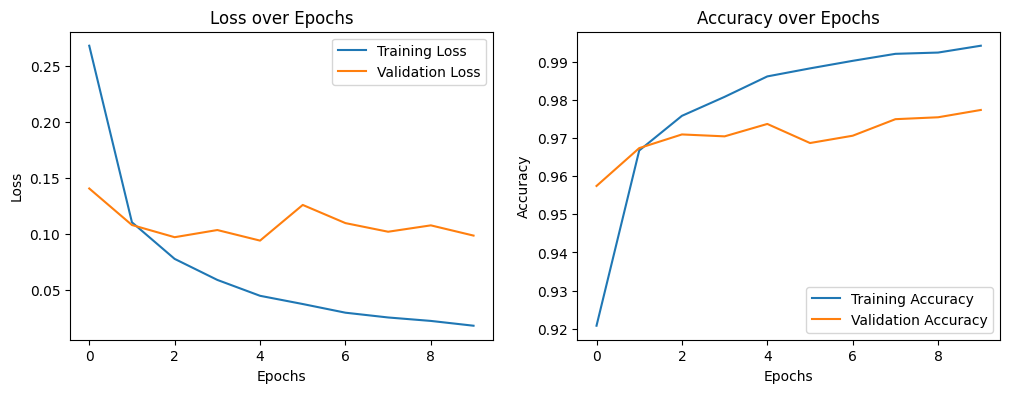

Model saved as 'mnist_mlp_model.h5'


In [13]:
# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the trained model
model.save("mnist_mlp_model.h5")
print("Model saved as 'mnist_mlp_model.h5'")

In [ ]:
print(X_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: [[1.5970895e-06 9.9403659e-11 2.6555513e-10 2.3342918e-07 5.0087578e-16
  9.9979931e-01 8.2535272e-12 5.7297669e-09 1.9893395e-04 1.0617684e-08]]


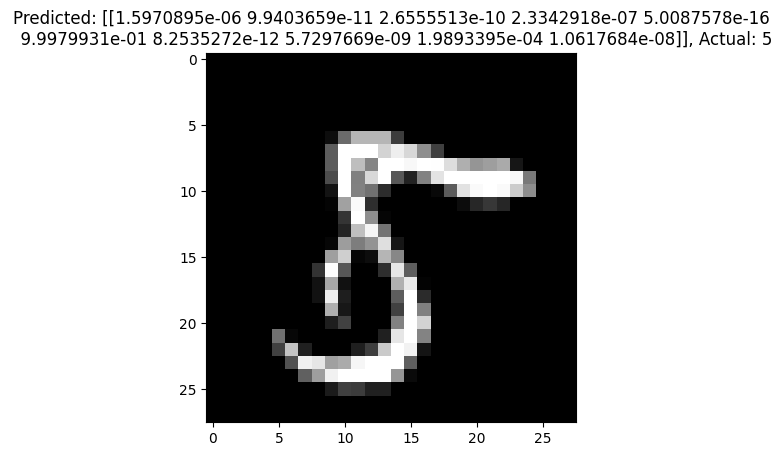

image.txt


In [15]:
# prompt: Predict and print one random input (Print the image too)

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import struct


# Load MNIST dataset (only test data is needed for prediction)
(_, _), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
X_test = X_test.astype('float32') / 255.0

# Choose a random index from the test set
random_index = np.random.randint(0, len(X_test))
random_image = X_test[random_index]

# Reshape the image to match the model's input shape
random_image = random_image.reshape(1, 28, 28)

# Make the prediction
predictions = model.predict(random_image)
#predicted_class = np.argmax(predictions)
predicted_class = predictions

# Print the prediction and display the image
print("Predicted class:", predicted_class)

# Display the image
plt.imshow(X_test[random_index], cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {y_test[random_index]}")
plt.show()

# Function to convert a float to IEEE 754 Hexadecimal
def float_to_hex(f):
    # Pack the float as IEEE 754 (32-bit)
    return hex(struct.unpack('!I', struct.pack('!f', f))[0])

# Open a file to save the IEEE 754 values
with open("mnist_image_fp.txt", "w") as f:
    # Convert each pixel in the image to IEEE 754 format and write to the file
    for i in range(28):
        for j in range(28):
            pixel_value = X_test[random_index, i, j]
            hex_value = float_to_hex(pixel_value)
            f.write(f"{hex_value}\n")

print("image.txt")

In [16]:
import numpy as np
import struct

# Function to convert a numpy array to IEEE 754 hexadecimal format and save to a text file
def save_to_ieee754_hex(data, filename):
    with open(filename, "w") as f:
        for value in np.nditer(data):
            hex_value = struct.pack('>f', float(value)).hex()  # Convert to IEEE 754 and get hexadecimal
            f.write(hex_value + "\n")  # Write each hex value on a new line

# Extract weights and biases and save in hexadecimal format
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:  # Check if the layer has weights
        weights, biases = layer.get_weights()

        # Save weights and biases in IEEE 754 hexadecimal format
        save_to_ieee754_hex(weights, f"layer_{i}_weights.txt")
        save_to_ieee754_hex(biases, f"layer_{i}_biases.txt")

        print(f"Layer {i} Weights saved to layer_{i}_weights.txt")
        print(f"Layer {i} Biases saved to layer_{i}_biases.txt")

Layer 1 Weights saved to layer_1_weights.txt
Layer 1 Biases saved to layer_1_biases.txt
Layer 2 Weights saved to layer_2_weights.txt
Layer 2 Biases saved to layer_2_biases.txt
Layer 3 Weights saved to layer_3_weights.txt
Layer 3 Biases saved to layer_3_biases.txt


In [20]:
# Extract weights and biases
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:  # Check if the layer has weights
        weights, biases = layer.get_weights()
        print(f"Layer {i} Weights:\n", weights)
        print(f"Layer {i} Biases:\n", biases)

# Save to file
import numpy as np

for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        np.savetxt(f"layer_{i}_weights.txt", weights, delimiter=",")
        np.savetxt(f"layer_{i}_biases.txt", biases, delimiter=",")

Layer 1 Weights:
 [[-0.02875069  0.02209077 -0.04470988 ...  0.04934429  0.01142681
  -0.04927942]
 [-0.03697358 -0.0151316  -0.08154688 ... -0.08610092  0.08642439
  -0.02759497]
 [-0.02303575 -0.02321478  0.05340498 ... -0.08523619  0.0043632
  -0.02750602]
 ...
 [-0.05077033 -0.07952956 -0.05509154 ...  0.07119196 -0.04051282
   0.05735927]
 [ 0.02822118 -0.08401067 -0.01483259 ...  0.03025078  0.01601552
  -0.0862129 ]
 [-0.08315856 -0.0057401   0.0216373  ... -0.04085524  0.01680989
   0.06728897]]
Layer 1 Biases:
 [-0.01241648  0.10463943  0.03053283 -0.01527926  0.07443214  0.15512215
 -0.020734    0.17452848 -0.3282605  -0.02091216]
